In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(84)


df = pd.read_csv('led.csv')

# **Data Preprocessing**


## Handling missing values

In [109]:
# Removing Irrelevant Columns
df['percentageexpenditure'] = df['Totalexpenditure']
df = df.drop(['Population', 'AdultMortality', 'Totalexpenditure', 'thinness1-19years', 'thinness5-9years', 'under-fivedeaths', 'Year', 'HIV/AIDS', 'Measles', 'infantdeaths', 'BMI', 'Alcohol'], axis=1)

In [110]:
# handling missing values
# imputation of the mean for columns with very little data missing
lifeexpectancy_median = df['Lifeexpectancy'].median()
df['Lifeexpectancy'] = df["Lifeexpectancy"].fillna(lifeexpectancy_median)

HepatitisB_median = df['HepatitisB'].median()
df['HepatitisB'] = df['HepatitisB'].fillna(HepatitisB_median)
Diptheria_median = df['Diphtheria'].median()
df['Diphtheria'] = df["Diphtheria"].fillna(Diptheria_median)

Polio_median = df['Polio'].median()
df['Polio'] = df["Polio"].fillna(Polio_median)

Incomecompositionofresources_median = df['Incomecompositionofresources'].median()
df['Incomecompositionofresources'] = df["Incomecompositionofresources"].fillna(Incomecompositionofresources_median)

Schooling_median = df['Schooling'].median()
df['Schooling'] = df["Schooling"].fillna(Schooling_median)

percexp_median = df['percentageexpenditure'].median()
df['percentageexpenditure'] = df["percentageexpenditure"].fillna(percexp_median)



In [111]:
df.dropna(subset=['GDP'], inplace=True)
df.reset_index(drop=True, inplace=True)


## One-hot-encoding

In [112]:
# handling categorical data
status_encoded = pd.get_dummies(df['Status'])
df = pd.concat([df, status_encoded], axis=1)
df = df.drop(['Status'], axis=1)

In [113]:
# add continent classification
country_to_continent = pd.read_csv('Countries_by_continents.csv')
df.reset_index(drop=True, inplace=True)
df_copy = pd.merge(df, country_to_continent, on='Country', how='outer')
Continent = df_copy['Continent']
df.insert(1, 'Continent', Continent)
continent_encoded = pd.get_dummies(df['Continent'])
df = pd.concat([df, continent_encoded], axis=1)
df = df.drop(['Continent'], axis=1)

## Handling Outliers

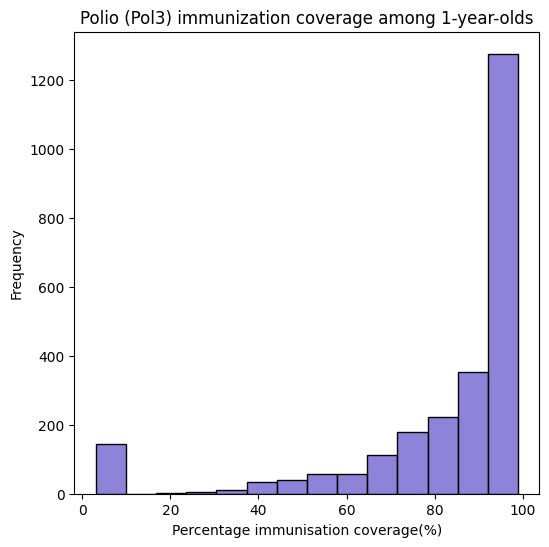

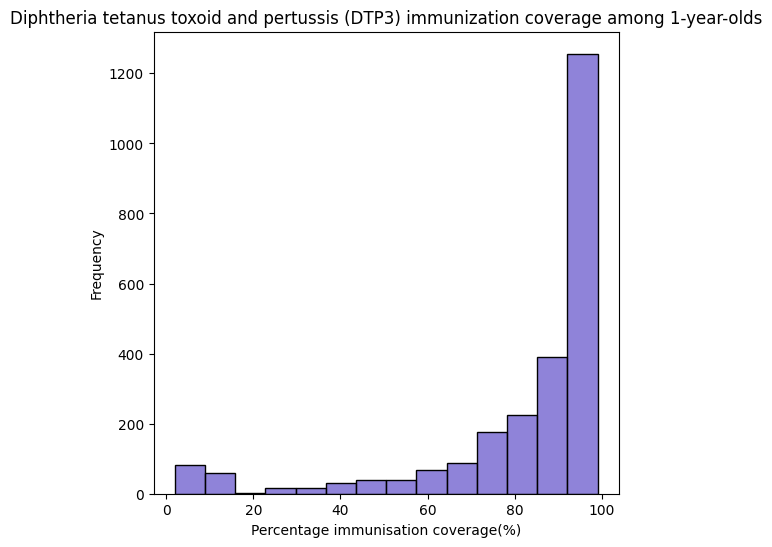

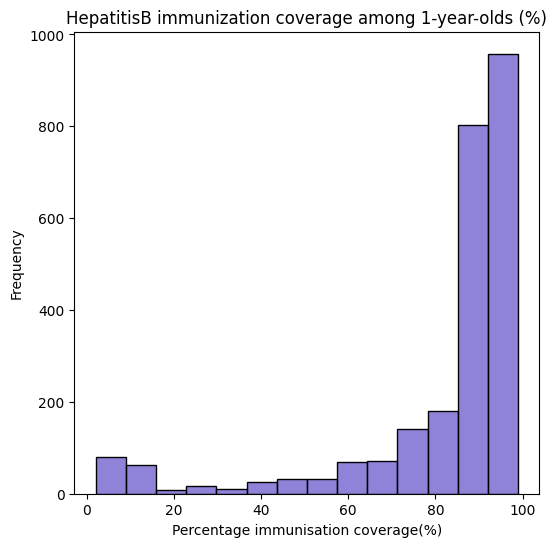

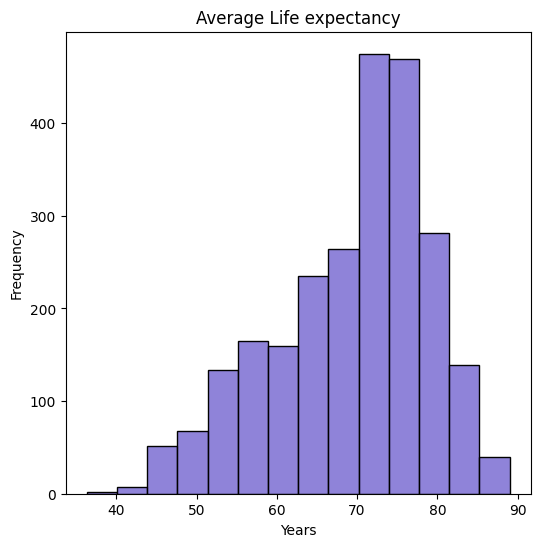

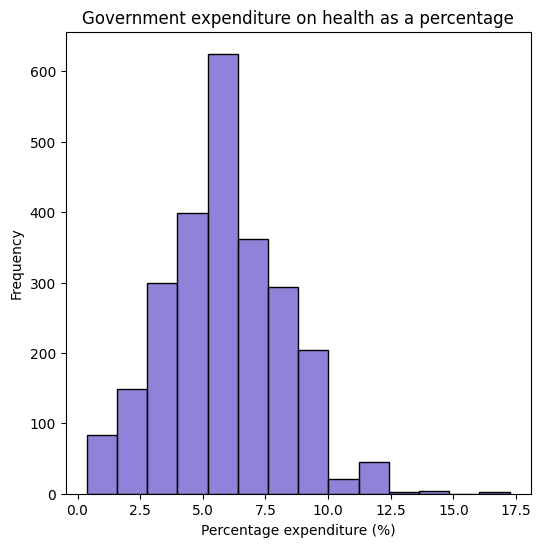

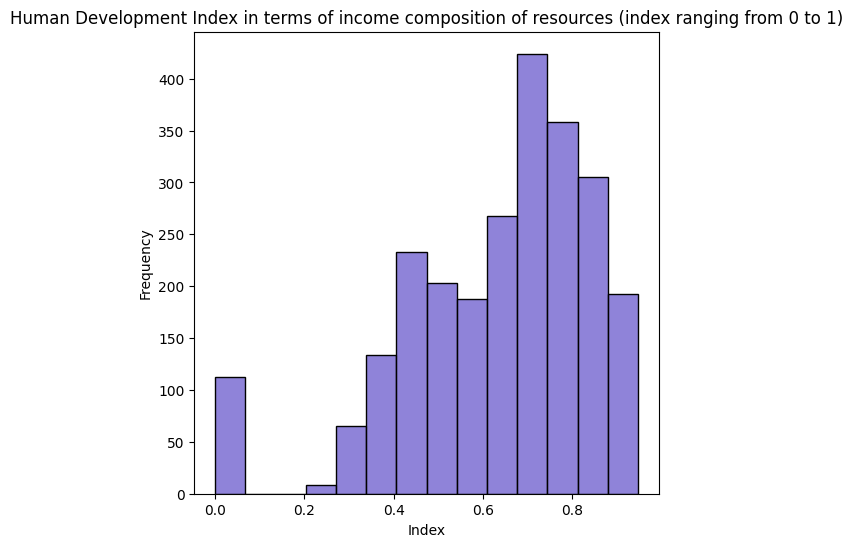

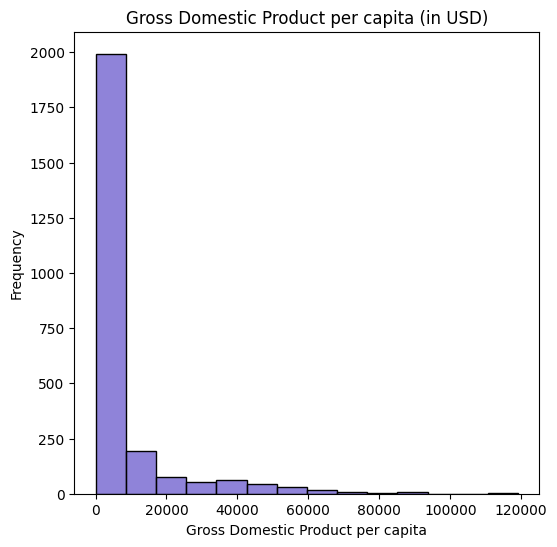

Text(0, 0.5, 'Frequency')

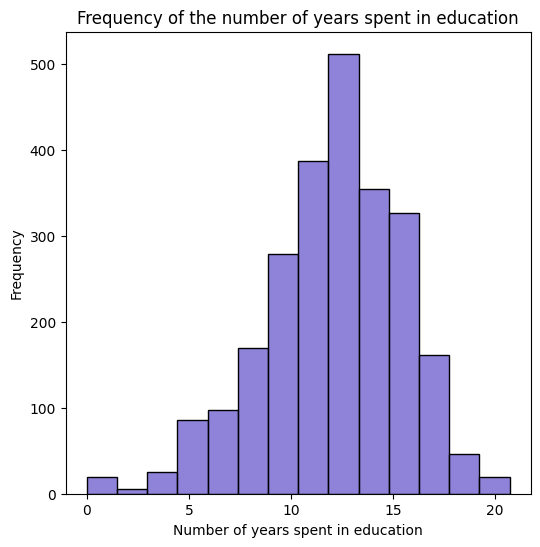

In [114]:
# Displaying Outliers
import seaborn as sns

data = df['Polio']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Polio (Pol3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['Diphtheria']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['HepatitisB']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('HepatitisB immunization coverage among 1-year-olds (%)')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()



data = df['Lifeexpectancy']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Average Life expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

data = df['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Government expenditure on health as a percentage')
plt.xlabel('Percentage expenditure (%)')
plt.ylabel('Frequency')
plt.show()


data = df['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Human Development Index in terms of income composition of resources (index ranging from 0 to 1)')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

data = df['GDP']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Gross Domestic Product per capita (in USD)')
plt.xlabel('Gross Domestic Product per capita')
plt.ylabel('Frequency')
plt.show()

data = df['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Frequency of the number of years spent in education')
plt.xlabel('Number of years spent in education')
plt.ylabel('Frequency')



In [115]:
# Handling Outliers
# Manual Winsorisation

#Polio
lower_lim = 30
upper_lim = 98
df.loc[df['Polio'] < lower_lim, 'Polio'] = lower_lim
df.loc[df['Polio'] > upper_lim, 'Polio'] = upper_lim

#Diphtheria
lower_lim = 30
upper_lim = 98
df.loc[df['Diphtheria'] < lower_lim, 'Diphtheria'] = lower_lim
df.loc[df['Diphtheria'] > upper_lim, 'Diphtheria'] = upper_lim

#HepatitisB
lower_lim = 30
upper_lim = 98
df.loc[df['HepatitisB'] < lower_lim, 'HepatitisB'] = lower_lim
df.loc[df['HepatitisB'] > upper_lim, 'HepatitisB'] = upper_lim

#Life expectancy
lower_lim = 50
upper_lim = 90
df.loc[df['Lifeexpectancy'] < lower_lim, 'Lifeexpectancy'] = lower_lim
df.loc[df['Lifeexpectancy'] > upper_lim, 'Lifeexpectancy'] = upper_lim

#Percentage expenditure
lower_lim = 3
upper_lim = 12.5
df.loc[df['percentageexpenditure'] < lower_lim, 'percentageexpenditure'] = lower_lim
df.loc[df['percentageexpenditure'] > upper_lim, 'percentageexpenditure'] = upper_lim

#GDP
lower_lim = 0
upper_lim = 100000
df.loc[df['GDP'] < lower_lim, 'GDP'] = lower_lim
df.loc[df['GDP'] > upper_lim, 'GDP'] = upper_lim

#Income composition of resources
lower_lim = 0.2
upper_lim = 1
df.loc[df['Incomecompositionofresources'] < lower_lim, 'Incomecompositionofresources'] = lower_lim
df.loc[df['Incomecompositionofresources'] > upper_lim, 'Incomecompositionofresources'] = upper_lim

#Schooling
lower_lim = 5
upper_lim = 20
df.loc[df['Schooling'] < lower_lim, 'Schooling'] = lower_lim
df.loc[df['Schooling'] > upper_lim, 'Schooling'] = upper_lim



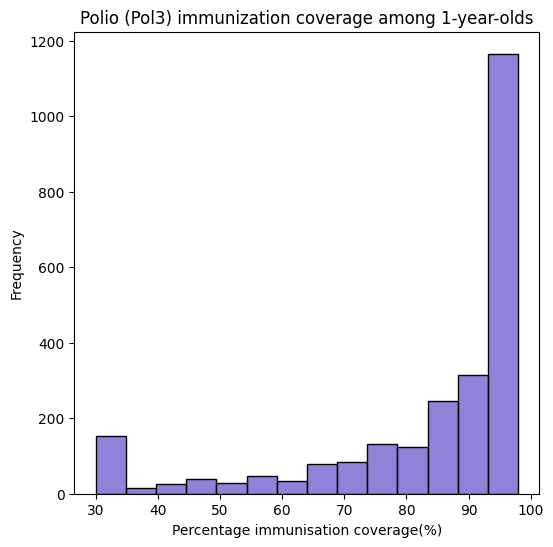

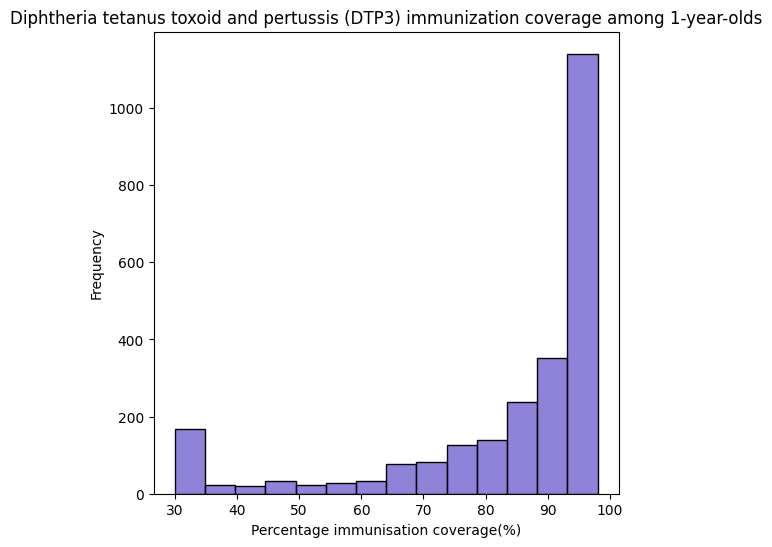

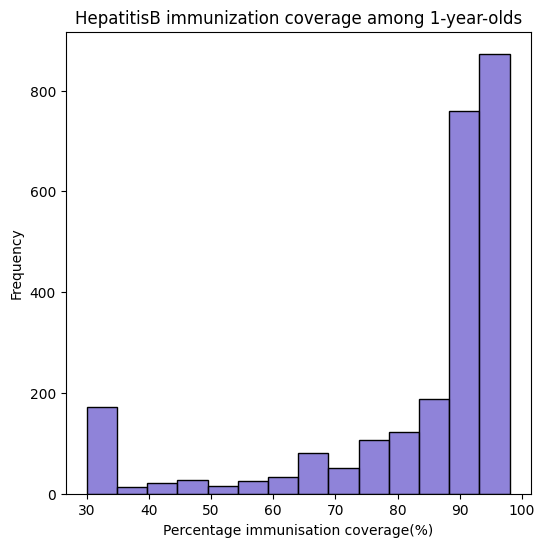

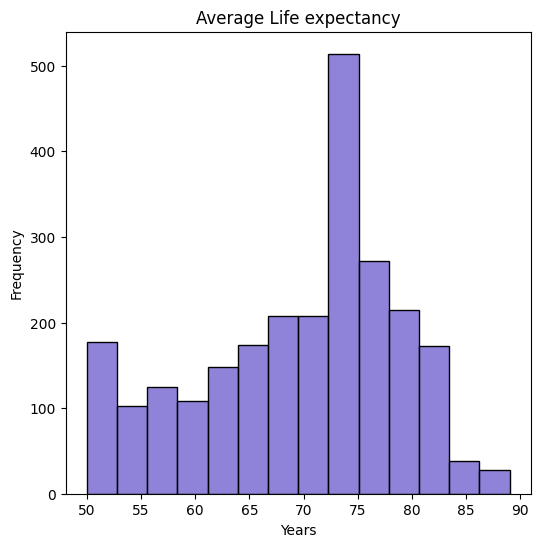

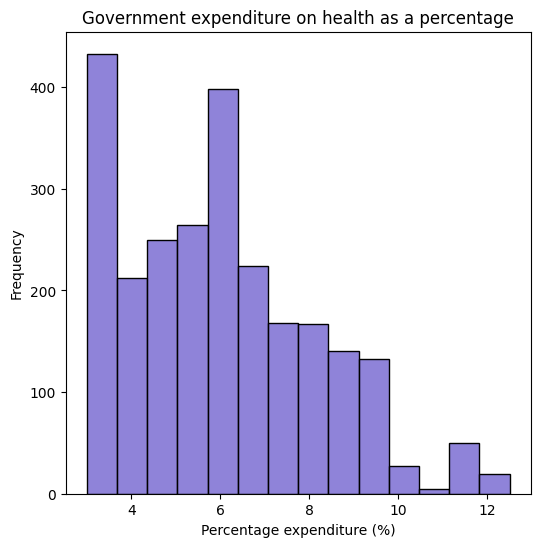

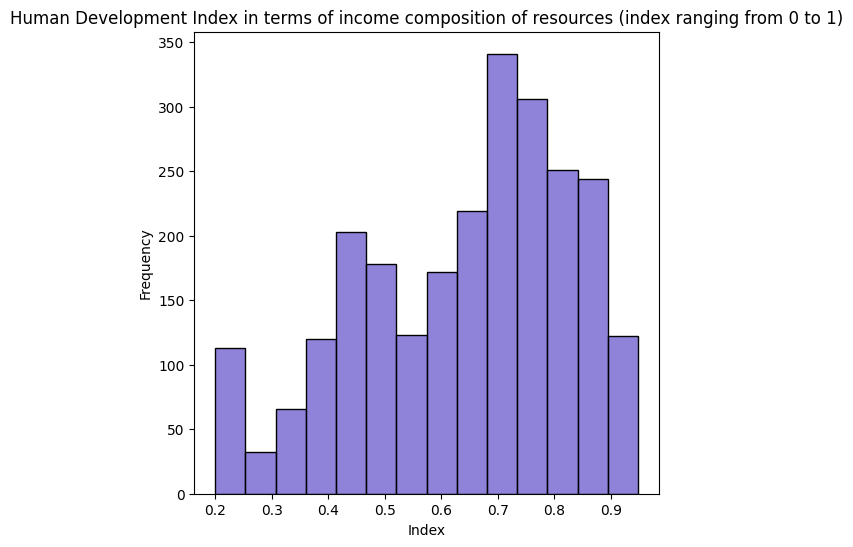

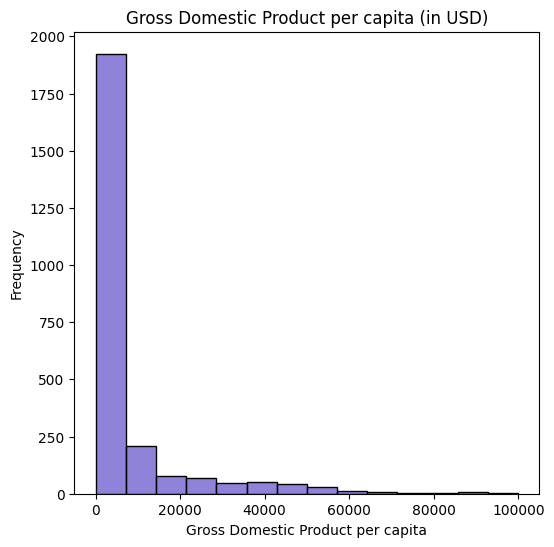

Text(0, 0.5, 'Frequency')

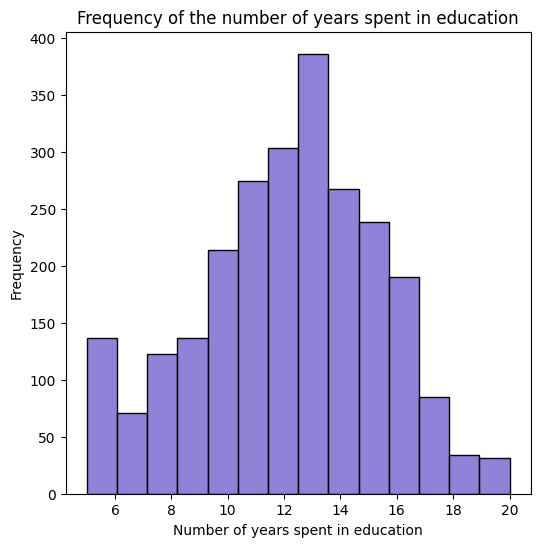

In [116]:
# Post Outlier Handling
data = df['Polio']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Polio (Pol3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['Diphtheria']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['HepatitisB']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('HepatitisB immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()



data = df['Lifeexpectancy']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Average Life expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

data = df['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Government expenditure on health as a percentage')
plt.xlabel('Percentage expenditure (%)')
plt.ylabel('Frequency')
plt.show()


data = df['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Human Development Index in terms of income composition of resources (index ranging from 0 to 1)')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

data = df['GDP']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Gross Domestic Product per capita (in USD)')
plt.xlabel('Gross Domestic Product per capita')
plt.ylabel('Frequency')
plt.show()

data = df['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Frequency of the number of years spent in education')
plt.xlabel('Number of years spent in education')
plt.ylabel('Frequency')





# **Visualisation**

## Bar Charts

(array([0, 1]), [Text(0, 0, 'Developed'), Text(1, 0, 'Developing')])

<Figure size 1000x600 with 0 Axes>

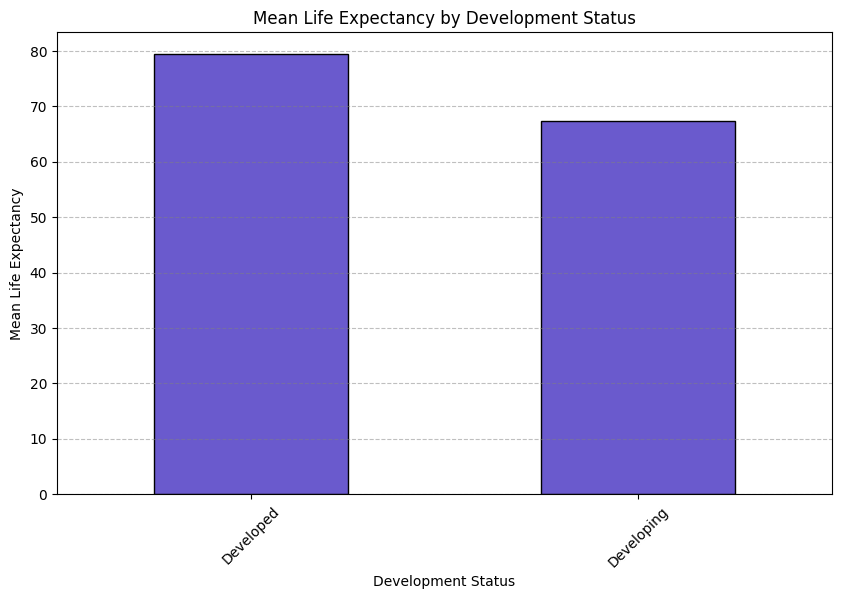

In [117]:
plt.figure(figsize=(10,6))
mean_developed_expectancy = df[df['Developed'] == 1]['Lifeexpectancy'].mean()
mean_developing_expectancy = df[df['Developing'] ==1]['Lifeexpectancy'].mean()
mean_expectancies = {'Developed': mean_developed_expectancy,
                     'Developing' : mean_developing_expectancy}
mean_expectancies = pd.Series(mean_expectancies)
fig, ax = plt.subplots(figsize=(10, 6))
mean_expectancies.plot(kind='bar', color='slateblue', edgecolor="black", ax=ax)
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.title('Mean Life Expectancy by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation = 45)


<Figure size 1000x600 with 0 Axes>

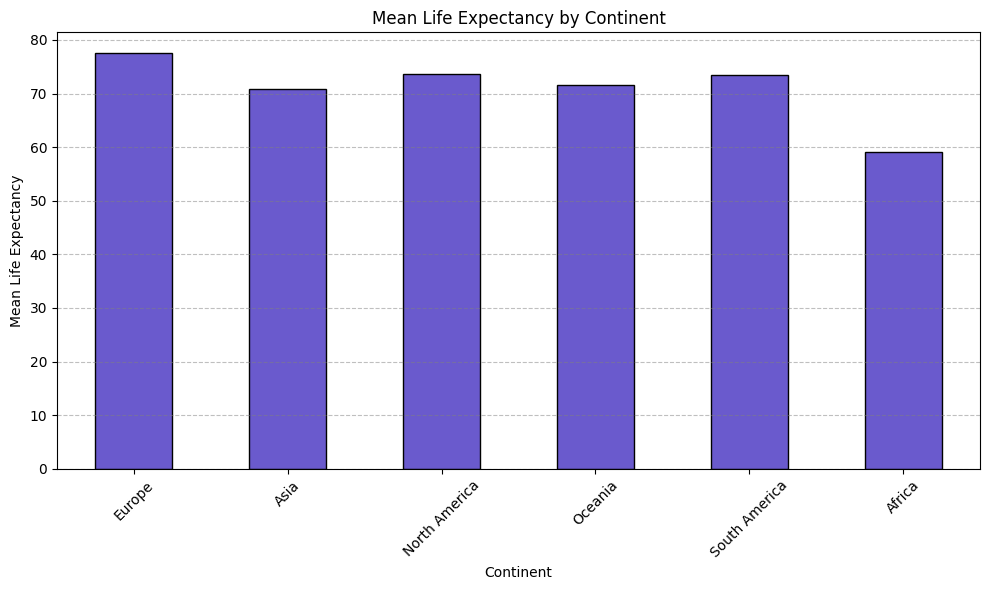

In [118]:
continent_means = {}

for continent in ['Europe', 'Asia', 'North America', 'Oceania', 'South America', 'Africa']:
    continent_df = df[df[continent] == 1]
    mean_life_expectancy = continent_df['Lifeexpectancy'].mean()

    continent_means[continent] = mean_life_expectancy

continent_means_series = pd.Series(continent_means)

# Plot the bar chart
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
continent_means_series.plot(kind='bar', color='slateblue', edgecolor="black", ax=ax)
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.title('Mean Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

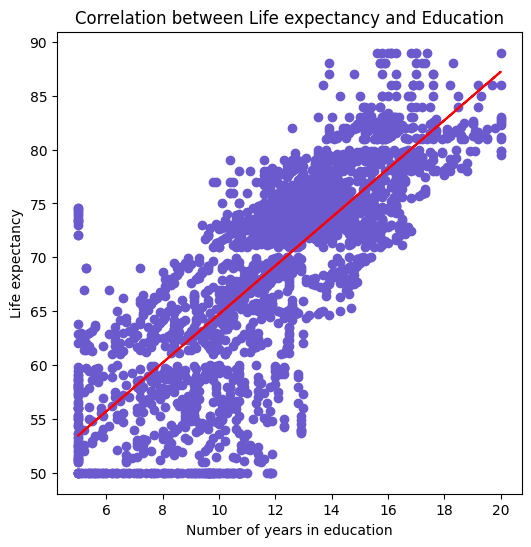

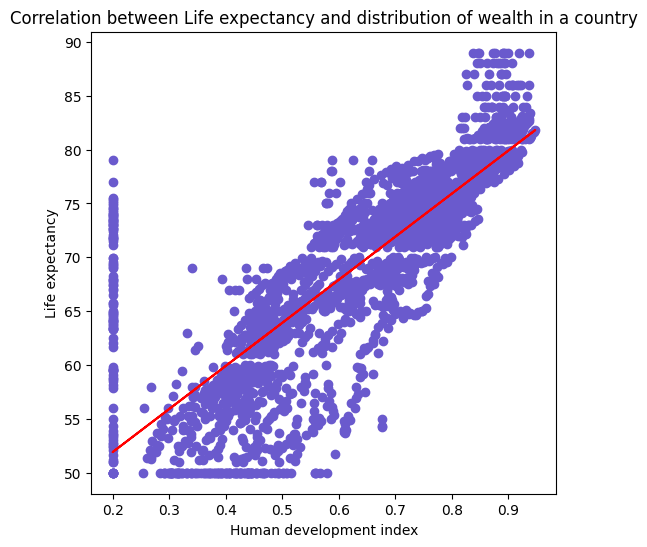

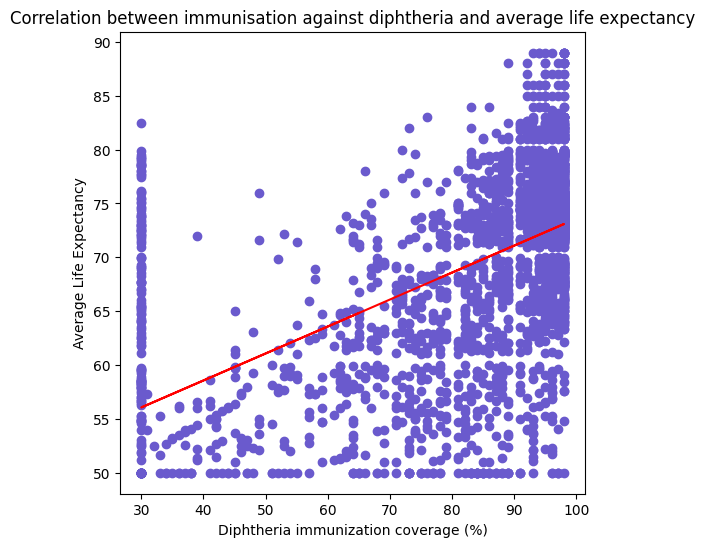

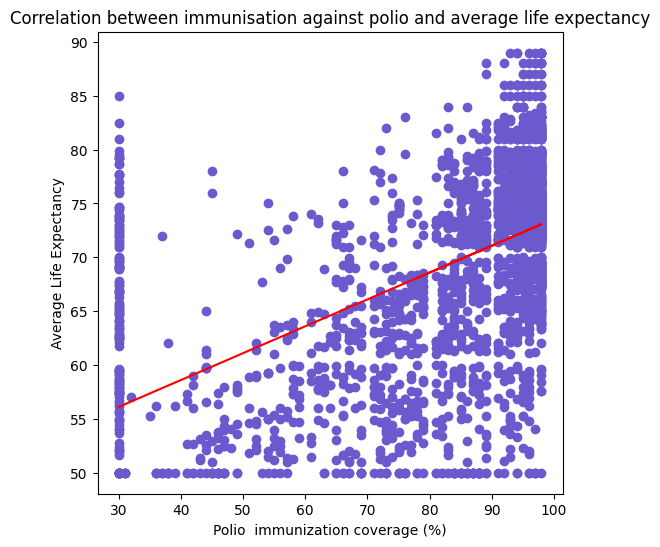

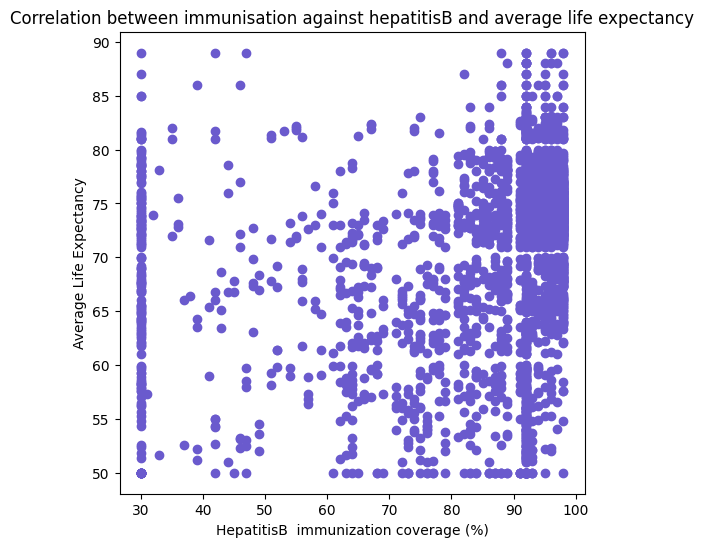

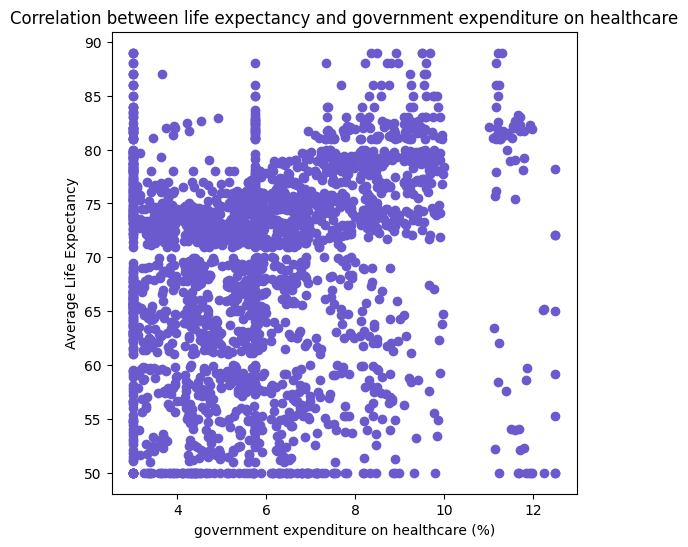

In [119]:
#Feature and life expectancy correlation
x = df['Schooling']
y = df['Lifeexpectancy']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Number of years in education')
plt.ylabel('Life expectancy')
plt.title('Correlation between Life expectancy and Education')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['Incomecompositionofresources']
y = df['Lifeexpectancy']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Human development index')
plt.ylabel('Life expectancy')
plt.title('Correlation between Life expectancy and distribution of wealth in a country')
plt.scatter(x, y, color='slateblue')
plt.show

x= df['Diphtheria']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Diphtheria immunization coverage (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between immunisation against diphtheria and average life expectancy')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['Polio']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Polio  immunization coverage (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between immunisation against polio and average life expectancy')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['HepatitisB']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel('HepatitisB  immunization coverage (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between immunisation against hepatitisB and average life expectancy')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['percentageexpenditure']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel('government expenditure on healthcare (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between life expectancy and government expenditure on healthcare')
plt.scatter(x, y, color='slateblue')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

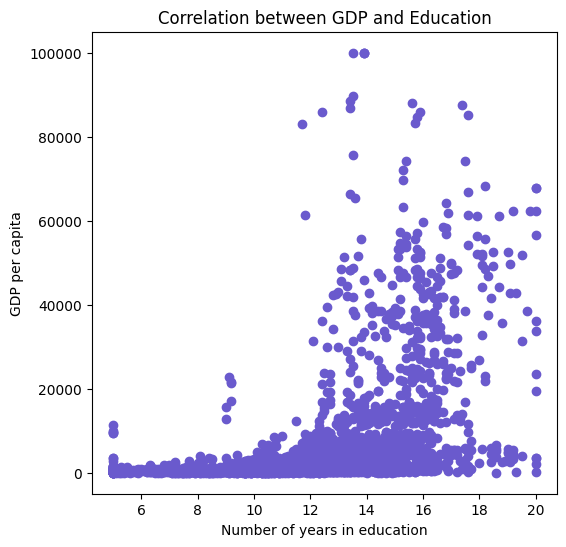

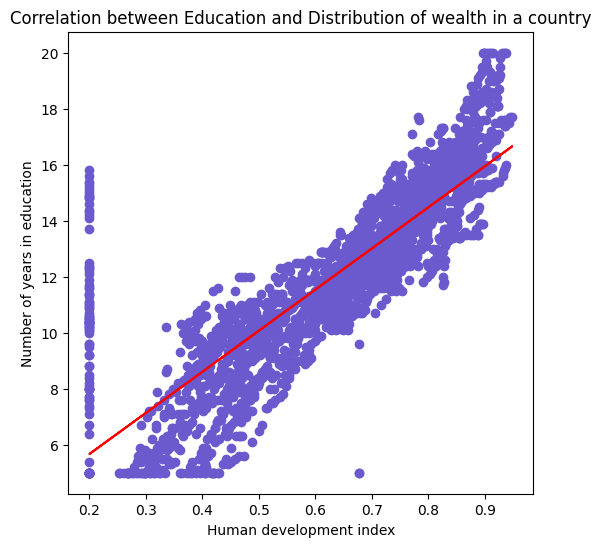

In [120]:
# feature on feature correlation
x= df['Schooling']
y = df['GDP']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel('Number of years in education')
plt.ylabel('GDP per capita')
plt.title('Correlation between GDP and Education')
plt.scatter(x, y, color='slateblue')
plt.show

y= df['Schooling']
x = df['Incomecompositionofresources']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.ylabel('Number of years in education')
plt.xlabel('Human development index')
plt.title('Correlation between Education and Distribution of wealth in a country')
plt.scatter(x, y, color='slateblue')
plt.show

## Histograms

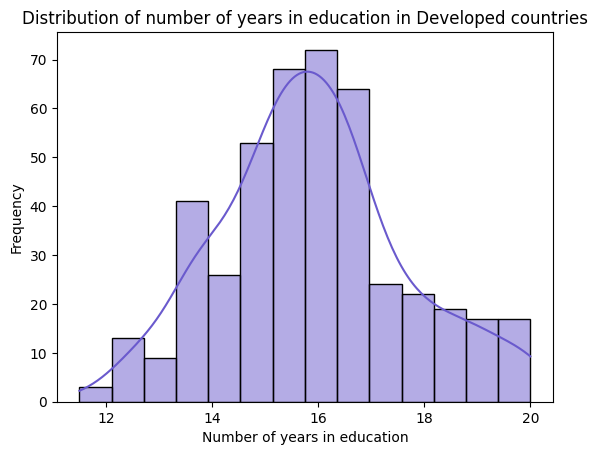

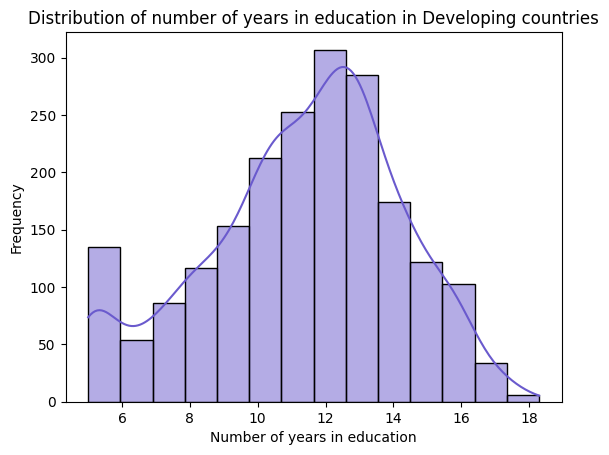

In [121]:
data = df[df['Developed'] == 1]['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Number of years in education')
plt.ylabel('Frequency')
plt.title('Distribution of number of years in education in Developed countries')
plt.show()


data = df[df['Developing'] == 1]['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Number of years in education')
plt.ylabel('Frequency')
plt.title('Distribution of number of years in education in Developing countries')
plt.show()


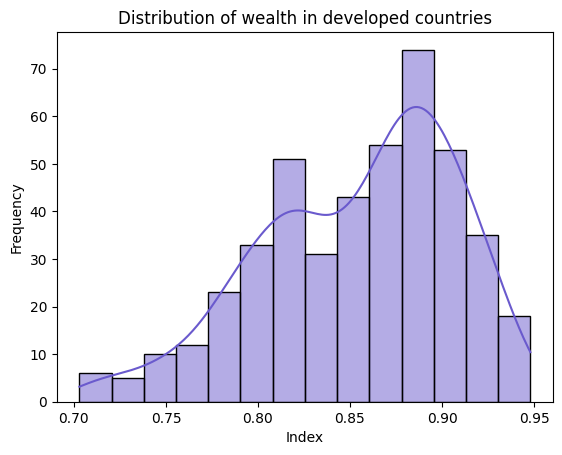

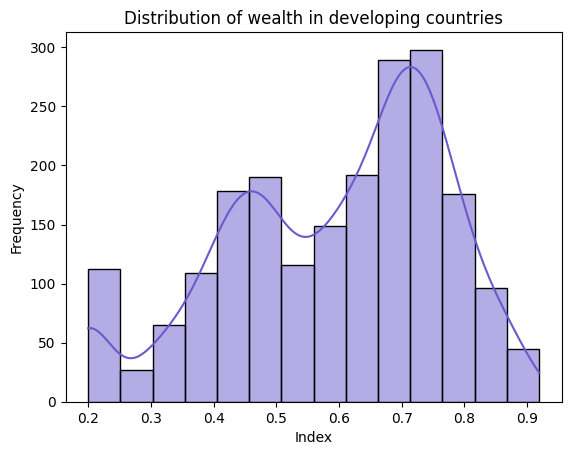

In [122]:
data = df[df['Developed'] == 1]['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Distribution of wealth in developed countries')
plt.show()


data = df[df['Developing'] == 1]['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Distribution of wealth in developing countries')
plt.show()



## Correlation Matrix

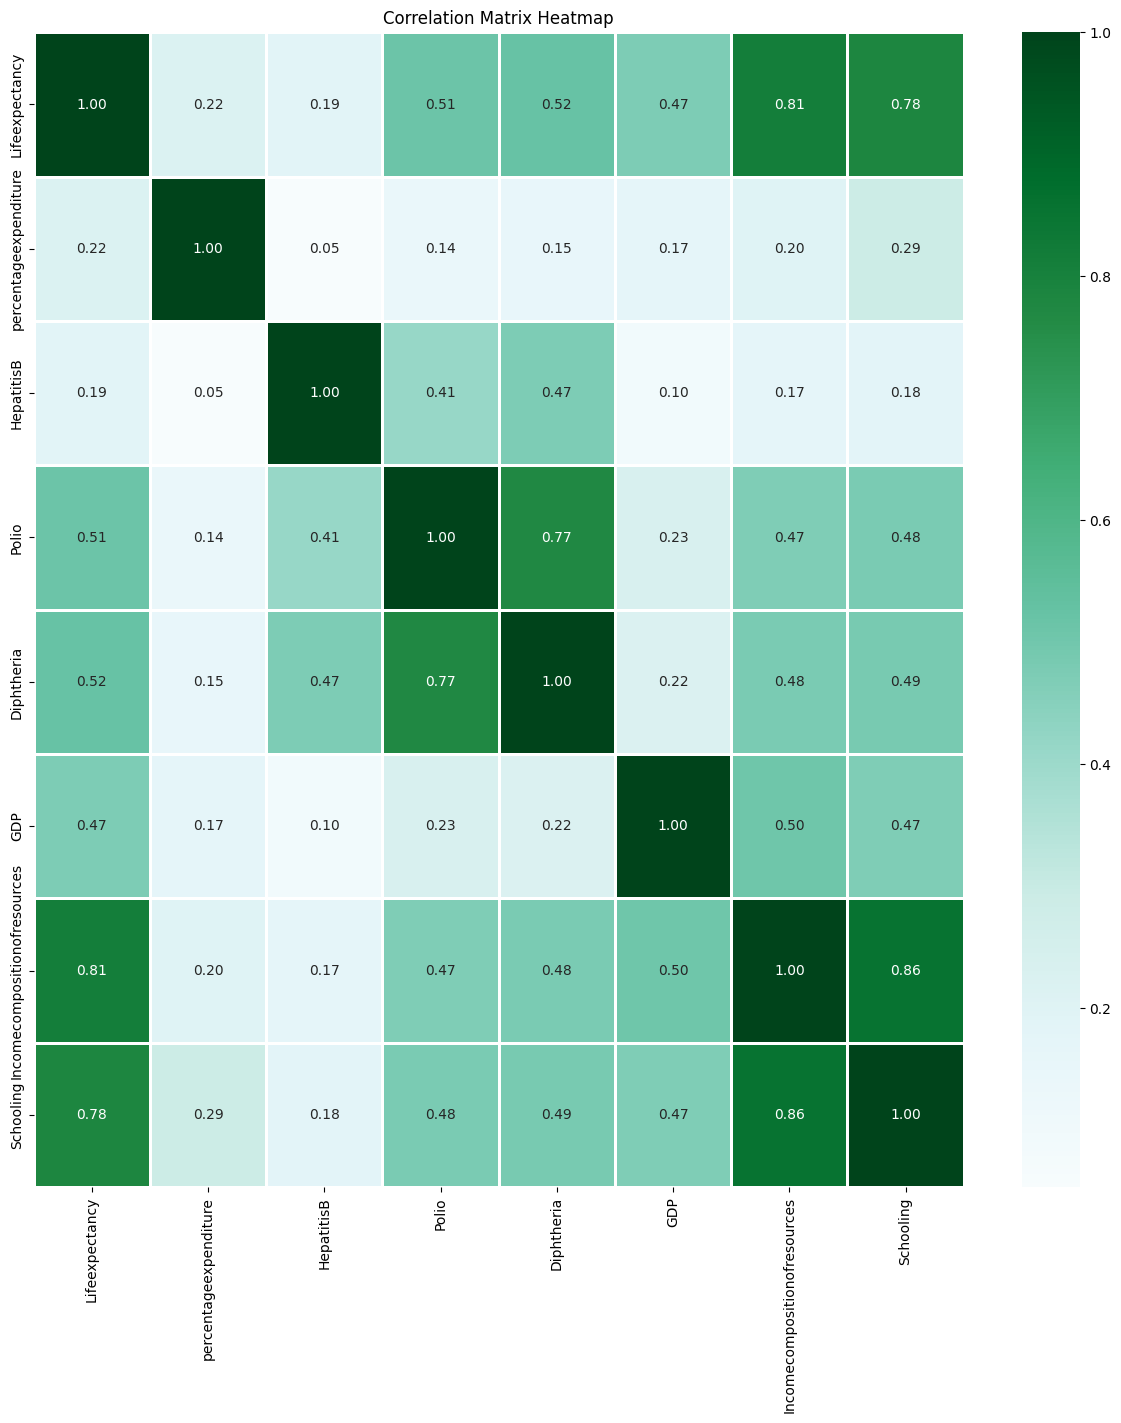

In [123]:
# Compute the correlation matrix
correlation_features = df[['Lifeexpectancy',  'percentageexpenditure', 'HepatitisB', 'Polio', 'Diphtheria','GDP', 'Incomecompositionofresources', 'Schooling']]
correlation_matrix = correlation_features.corr()

# Generate a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f", linewidths=0.9)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Data Standardisation**

In [124]:
from sklearn.preprocessing import StandardScaler
df_copy = df.copy()
std_life_expectancy = df_copy['Lifeexpectancy'].std()
mean_life_expectancy = df_copy['Lifeexpectancy'].mean()
print(std_life_expectancy)
print(mean_life_expectancy)
scaler = StandardScaler()
column_names = ['Schooling', 'Incomecompositionofresources', 'GDP', 'percentageexpenditure', 'Polio', 'Diphtheria', 'HepatitisB', 'Lifeexpectancy']
scaled_data = scaler.fit_transform(df[column_names])
df = pd.DataFrame(scaled_data, columns=column_names)
df.reset_index(drop=True, inplace=True)

columns_to_add = ['Developed', 'Developing', 'Europe', 'North America', 'South America', 'Africa', 'Asia', 'Oceania']
df = pd.concat([df, df_copy[columns_to_add]], axis=1)

9.302834295516298
69.5206827309237


# **Dimensionality Reduction**


In [125]:
from sklearn.decomposition import PCA

vaccinations = df[["HepatitisB", "Polio", "Diphtheria"]]
pca = PCA(n_components=1)
Vaccinations_reduced = pca.fit_transform(vaccinations)


SocialGroup = df[["GDP", "Schooling", "Incomecompositionofresources", "percentageexpenditure"]]
SocialGroup_reduced = pca.fit_transform(SocialGroup)




# **Data Splitting**

In [126]:
from sklearn.model_selection import train_test_split

df = df.sample(frac = 1)

#GDP
GDP_train_val, GDP_test = train_test_split(df["GDP"], test_size=0.1, random_state=42)
GDP_train, GDP_val = train_test_split(GDP_train_val, test_size=0.2, random_state=42)

#Schooling
Schooling_train_val, Schooling_test = train_test_split(df["Schooling"], test_size=0.1, random_state=42)
Schooling_train, Schooling_val = train_test_split(Schooling_train_val, test_size=0.2, random_state=42)

#IncomeCompositionOfResources
IncomeCompositionOfResources_train_val, IncomeCompositionOfResources_test = train_test_split(df["Incomecompositionofresources"], test_size=0.1, random_state=42)
IncomeCompositionOfResources_train, IncomeCompositionOfResources_val = train_test_split(IncomeCompositionOfResources_train_val, test_size=0.2, random_state=42)

#PercentageExpenditure
PercentageExpenditure_train_val, PercentageExpenditure_test = train_test_split(df["percentageexpenditure"], test_size=0.1, random_state=42)
PercentageExpenditure_train, PercentageExpenditure_val = train_test_split(PercentageExpenditure_train_val, test_size=0.2, random_state=42)

#LifeExpectancy
LifeExpectancy_train_val, LifeExpectancy_test = train_test_split(df["Lifeexpectancy"], test_size=0.1, random_state=42)
LifeExpectancy_train, LifeExpectancy_val = train_test_split(LifeExpectancy_train_val, test_size=0.2, random_state=42)

#Vaccinations
Vaccinations_train_val, Vaccinations_test = train_test_split(Vaccinations_reduced, test_size=0.1, random_state=42)
Vaccinations_train, Vaccinations_val = train_test_split(Vaccinations_train_val, test_size=0.2, random_state=42)

#Continents
Continents = df[["Europe", "North America", "Oceania", "South America", "Africa", "Asia"]]
Development_status = df[['Developing', 'Developed']]
Continents_train_val, Continents_test = train_test_split(Continents, test_size=0.1, random_state=42)
Continents_train, Continents_val = train_test_split(Continents_train_val, test_size=0.2, random_state=42)

#HepatitisB
HepatitisB_train_val, HepatitisB_test = train_test_split(df["HepatitisB"], test_size=0.1, random_state=42)
HepatitisB_train, HepatitisB_val = train_test_split(HepatitisB_train_val, test_size=0.2, random_state=42)

#Polio
Polio_train_val, Polio_test = train_test_split(df["Polio"], test_size=0.1, random_state=42)
Polio_train, Polio_val = train_test_split(Polio_train_val, test_size=0.2, random_state=42)

#Diphtheria
Diphtheria_train_val, Diphtheria_test = train_test_split(df["Diphtheria"], test_size=0.1, random_state=42)
Diphtheria_train, Diphtheria_val = train_test_split(Diphtheria_train_val, test_size=0.2, random_state=42)

#Development
Development_status_train_val, Development_status_test = train_test_split(Development_status, test_size=0.1, random_state=42)
Development_status_train, Development_status_val = train_test_split(Development_status_train_val, test_size=0.2, random_state=42)

#SocialGroup
SocialGroup_reduced_train_val, SocialGroup_reduced_test = train_test_split(SocialGroup_reduced, test_size=0.1, random_state=42)
SocialGroup_reduced_train, SocialGroup_reduced_val = train_test_split(SocialGroup_reduced_train_val, test_size=0.2, random_state=42)



# **Model Implementations**

## Main Question Model Comparisons

### Does your social group affect life expectancy: Linear (and Polynomial Regression)

Linear Regression

In [127]:

#training main question with linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
model = LinearRegression()
model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [0.06648147 0.32659797 0.50741333 0.00965701]
Intercept: -0.0025257679619205085


In [128]:
#testing main questions with linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred= model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean squared error:", mse)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


Mean squared error: 0.25992607513899774
r2:  0.7367134893238094


In [129]:
X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
prediction = model.predict(X_test)
prediction_unstandard = (prediction * std_life_expectancy) + mean_life_expectancy
prediction_unstandard

array([62.89721504, 65.02276343, 81.4881955 , 70.24468174, 81.04094951,
       65.35311493, 69.44970656, 62.31552212, 78.5477944 , 61.67628813,
       63.1496326 , 71.46545181, 78.66057197, 74.85162348, 76.19484701,
       58.7852718 , 71.83444348, 65.16309587, 71.67370158, 74.93703531,
       76.21441717, 56.69090704, 71.53240825, 67.68488908, 61.85773332,
       73.16633426, 68.57538936, 63.0848466 , 80.77881241, 79.41407722,
       76.52523687, 81.2472666 , 63.86359279, 71.6281292 , 73.34939631,
       72.60760585, 56.51982107, 74.85982971, 74.79100848, 54.29996177,
       66.24391995, 71.38041017, 57.34164968, 66.88695929, 84.13752001,
       70.61999018, 71.56975502, 73.32548457, 73.46782591, 61.34536508,
       65.94058083, 61.9535551 , 64.66119334, 72.60676108, 59.5100852 ,
       67.08910939, 79.59031039, 61.99028282, 73.96187084, 76.00708049,
       75.66819182, 68.6580497 , 51.83576479, 59.84301036, 67.28088775,
       70.06259962, 60.24415561, 67.68656002, 62.918983  , 60.92

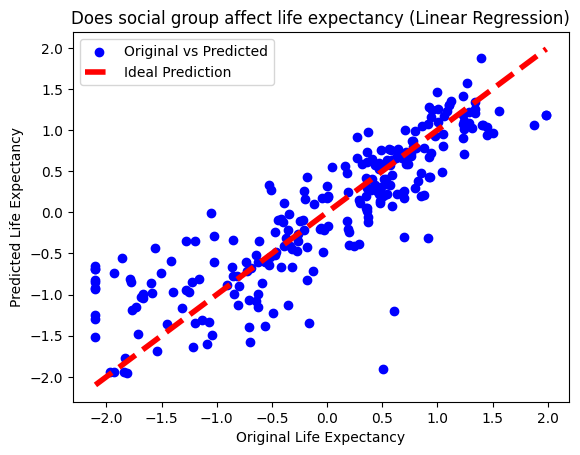

In [130]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Does social group affect life expectancy (Linear Regression)')
plt.legend()
plt.show()


Polynomial Regression without PCA

In [131]:
#Polynomial regression without PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly_train, LifeExpectancy_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 6.67641703e-16 -4.77805254e-01 -6.30917111e-01  1.80631031e+00
  2.03787090e-01  3.43594083e-01 -3.15100399e-01  1.39149127e-01
  2.87787547e-01 -1.00279350e-01  4.51414814e-01 -6.31175214e-02
 -1.66415873e-01 -1.00232921e-01  2.36179609e-02  3.03538534e-02
  5.40974338e-02 -4.96240791e-01  5.64482808e-02 -1.42682902e-01
  3.40891074e-01  7.31618163e-02  4.76211073e-01 -4.28260403e-01
  6.45984464e-03  1.68334027e-03 -4.21679853e-02 -3.55510468e-02
  3.38164822e-01  2.99778541e-02  3.42856509e-02 -4.58727840e-01
  2.73540701e-02  1.96416038e-03 -1.29854231e-02]
Intercept: -0.31380134621531536


In [132]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


X_val = np.column_stack((GDP_val, Schooling_val, IncomeCompositionOfResources_val, PercentageExpenditure_val))
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, LifeExpectancy_val)
print("Best negative mean squared error:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best negative mean squared error: -0.27930001961225714
Best parameters: {'poly__degree': 2}


In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
X_poly_test = poly.transform(X_test)
y_pred_test = model.predict(X_poly_test)
mse_test = mean_squared_error(LifeExpectancy_test, y_pred_test)
print("Mean squared error:", mse_test)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


Mean squared error: 0.14832137006104754
r2:  0.7367134893238094


In [134]:
X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
X_poly = poly.transform(X_test)
y_pred = model.predict(X_poly)
y_pred_unstandard = (y_pred * std_life_expectancy) + mean_life_expectancy
y_pred_unstandard

array([61.05767358, 64.84334184, 77.89990343, 74.14352343, 81.64884947,
       63.94285426, 65.56765488, 59.38152757, 78.6588302 , 56.40202922,
       56.80779974, 74.91967252, 76.87114043, 76.03886478, 74.68595359,
       62.84094429, 71.81804473, 62.3697094 , 72.85250386, 76.59890406,
       77.58476361, 65.50785375, 72.57502615, 71.01142705, 56.37466589,
       72.60109167, 68.90358859, 57.58775304, 81.51343311, 81.16862646,
       72.83366578, 83.34526375, 58.46950946, 75.09495859, 71.77947258,
       76.36040447, 58.42713316, 74.51193262, 75.14914475, 55.01165386,
       68.8947709 , 71.6905769 , 58.53690929, 65.89645938, 85.36100859,
       69.63965418, 74.3689371 , 74.98515592, 76.91909012, 59.06026436,
       66.7373714 , 57.69120628, 59.17875805, 76.40802014, 63.3394601 ,
       67.701329  , 81.53406989, 55.74206501, 73.4546413 , 76.30556152,
       76.40594707, 69.73786029, 69.60944226, 53.77388977, 64.42706009,
       70.34451913, 54.96889231, 69.40160903, 61.75655672, 54.44

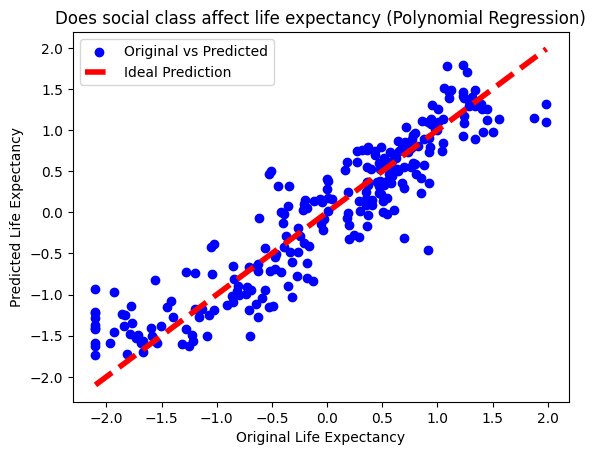

In [135]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred_test, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Does social class affect life expectancy (Polynomial Regression)')
plt.legend()
plt.show()


Polynomial Regression with PCA

In [136]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(SocialGroup_reduced_train, LifeExpectancy_train)
best_model = grid_search.best_estimator_

print("Best degree of polynomial features:", best_model.named_steps['poly'].degree)



Best degree of polynomial features: 1


In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(SocialGroup_reduced_train)
model = LinearRegression()
model.fit(X_poly_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.         -0.03547316]
Intercept: 0.0014144338796796044


In [138]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = poly.transform(SocialGroup_reduced_test)
predictions = model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(LifeExpectancy_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 0.9920485772593208
R-squared: -0.0048742058226001195


In [139]:
predictions = best_model.predict(SocialGroup_reduced_test)
predictions_unstandard = (predictions * std_life_expectancy) + mean_life_expectancy
predictions_unstandard

array([69.66883014, 70.45193058, 69.80731472, 69.81477018, 69.25770348,
       70.05101944, 69.33068885, 70.00077069, 69.95039562, 69.83883648,
       70.02759455, 70.35340241, 69.30530668, 69.77675825, 69.18819318,
       69.58683488, 68.66314439, 69.65334871, 69.42569473, 69.35131113,
       69.47936213, 69.84260921, 69.55607782, 69.77225236, 69.88543341,
       70.25692945, 70.07347522, 68.64563938, 70.360759  , 69.29001681,
       70.18234692, 68.46061681, 69.84996125, 68.87843646, 68.70823839,
       70.3867501 , 68.25770112, 69.65474338, 68.99160928, 69.45280083,
       69.9793062 , 69.2787575 , 69.9264115 , 70.05914391, 69.07823225,
       70.09884136, 70.16150733, 69.38952493, 69.50678321, 69.66634049,
       70.03633228, 69.32911681, 69.28250211, 69.76264249, 70.1563075 ,
       70.2487655 , 68.59659714, 69.50859822, 69.47395493, 69.07090624,
       69.68231127, 69.41438699, 69.91008208, 69.44378478, 70.01562039,
       70.60752782, 70.37440111, 68.90511463, 68.91005301, 68.09

### Does your social group affect life expectancy: Lasso Regression

Coefficients: [0.01840489 0.71069118]
Intercept: -0.001038917365934737


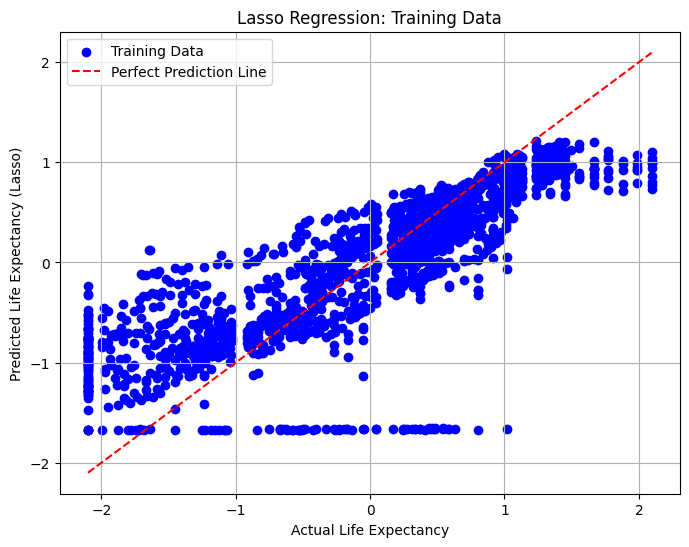

In [171]:
# MAIN QUESTION: How does social group affect life expectancy?
from sklearn.linear_model import Lasso

# training Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)

# plotting training data with Lasso regression
plt.figure(figsize=(8, 6))
plt.scatter(LifeExpectancy_train, lasso_model.predict(X_train), color='blue', label='Training Data')
plt.plot([min(LifeExpectancy_train), max(LifeExpectancy_train)], [min(LifeExpectancy_train), max(LifeExpectancy_train)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Lasso)')
plt.title('Lasso Regression: Training Data')
plt.legend()
plt.grid(True)
plt.show()

Mean squared error (Lasso): 0.27632245935829963


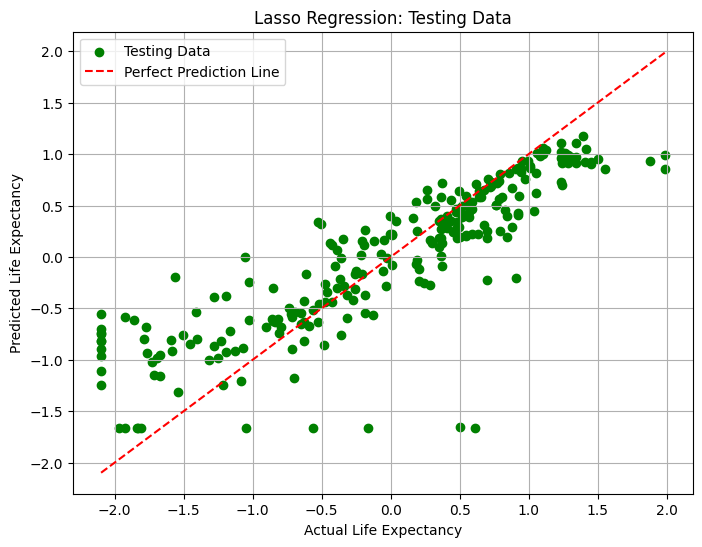

In [172]:
# testing lasso regression model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(LifeExpectancy_test, y_pred_lasso)
print("Mean squared error (Lasso):", mse_lasso)
plt.figure(figsize=(8, 6))
plt.scatter(LifeExpectancy_test, y_pred_lasso, color='green', label='Testing Data')
plt.plot([min(LifeExpectancy_test), max(LifeExpectancy_test)], [min(LifeExpectancy_test), max(LifeExpectancy_test)], color='red', linestyle='--',label='Perfect Prediction Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Lasso Regression: Testing Data')
plt.legend()
plt.grid(True)
plt.show()

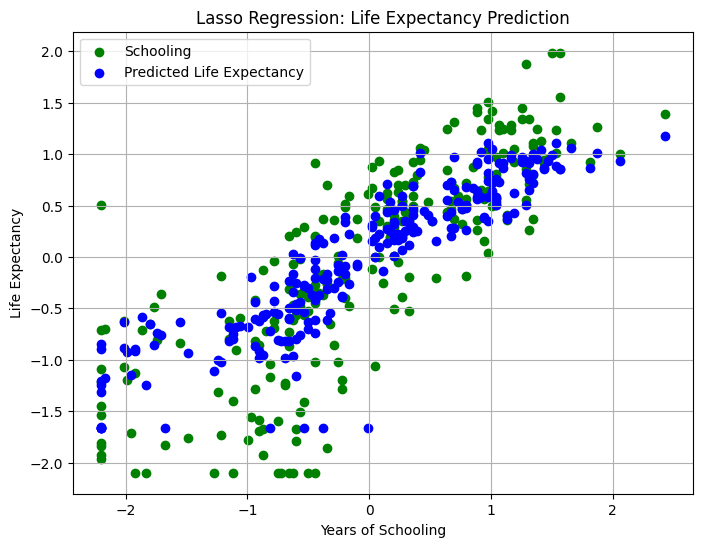

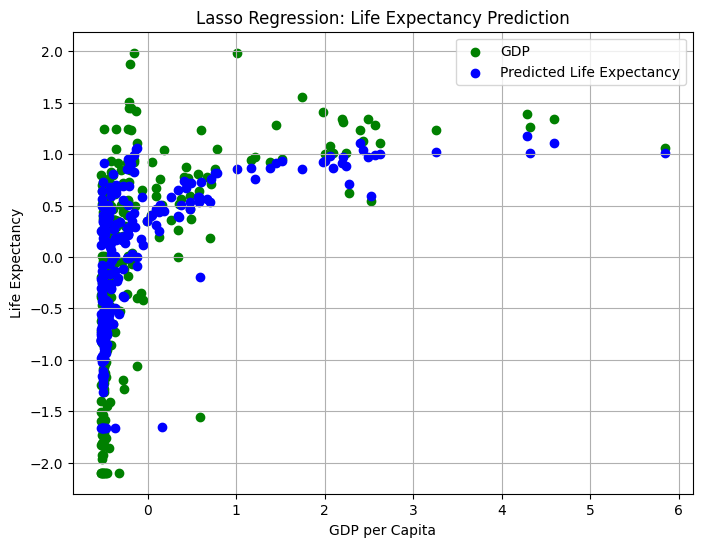

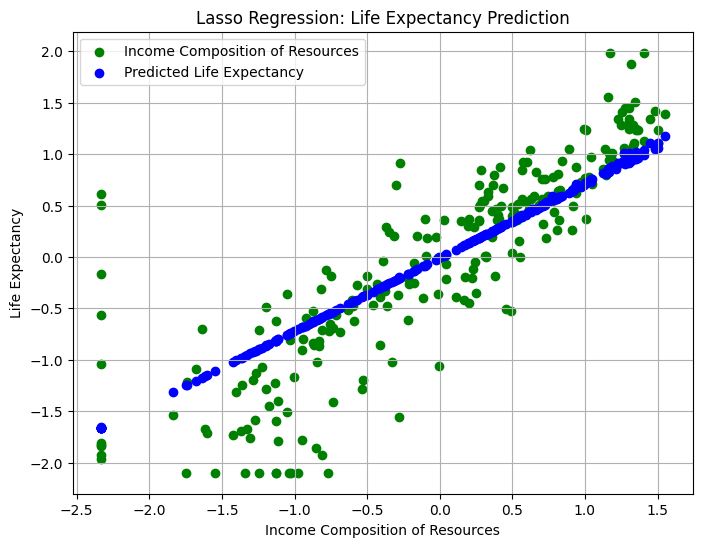

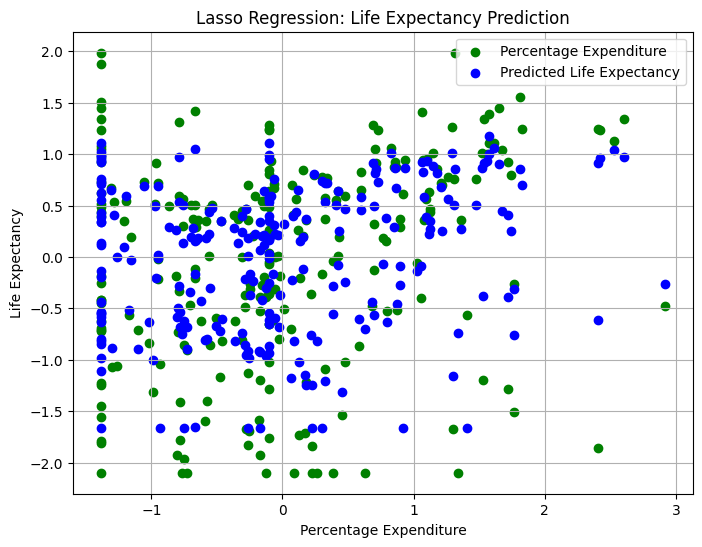

In [173]:
import matplotlib.pyplot as plt

# Plotting indivodual features against life expectancy
plt.figure(figsize=(8, 6))
plt.scatter(Schooling_test, LifeExpectancy_test, color='green', label='Schooling')
plt.scatter(Schooling_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()

# gdp
plt.figure(figsize=(8, 6))
plt.scatter(GDP_test, LifeExpectancy_test, color='green', label='GDP')
plt.scatter(GDP_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()

# income composition of resources
plt.figure(figsize=(8, 6))
plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='green', label='Income Composition of Resources')
plt.scatter(IncomeCompositionOfResources_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()


# percentage expenditure
plt.figure(figsize=(8, 6))
plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='green', label='Percentage Expenditure')
plt.scatter(PercentageExpenditure_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()



Predicted Life Expectancy (Lasso): [0.75156297]


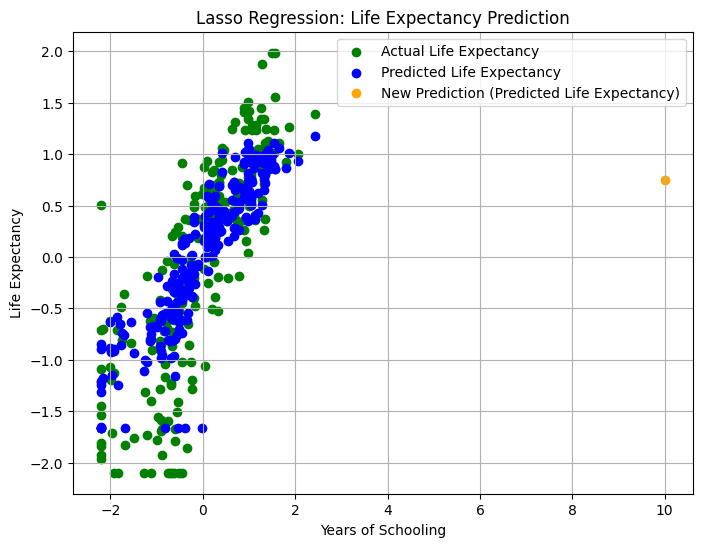

In [174]:
# make prediction for the new data point
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
X_new = np.array([[new_Schooling, new_IncomeCompositionOfResources]])
predicted_life_expectancy_lasso = lasso_model.predict(X_new)
print("Predicted Life Expectancy (Lasso):", predicted_life_expectancy_lasso)

# plotting testing results including the new prediction
plt.figure(figsize=(8, 6))
plt.scatter(Schooling_test, LifeExpectancy_test, color='green', label='Actual Life Expectancy')
plt.scatter(Schooling_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.scatter(new_Schooling, predicted_life_expectancy_lasso, color='orange', label='New Prediction (Predicted Life Expectancy)')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()

### Doesyour social group affect life expectancy: Elastic Net Regression

In [144]:
# Does social class affect life expectancy
from sklearn.linear_model import ElasticNet
import numpy as np

# train elastic net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using Elastic Net with alpha=0.1 and l1_ratio=0.5
X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
elastic_net_model.fit(X_train, LifeExpectancy_train)

ElasticNet(alpha=0.1)

In [145]:
print("Coefficients:", elastic_net_model.coef_)
print("Intercept:", elastic_net_model.intercept_)

Coefficients: [0.04602699 0.31910039 0.45274532 0.        ]
Intercept: -0.0024551350443771294


In [146]:
# testing elastic net regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

Mean squared error: 0.26634020164223393


In [147]:
# testing elastic net regression model using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

R2 Score: 0.730216438248154


In [148]:
#Optimising the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

# create Elastic Net model
elastic_net_model = ElasticNet()

# create a dictionary of hyperparameters to search
search_parameters = {
    'alpha': [0.01, 0.04, 0.05, 0.06, 0.07,0.075, 0.1,],
    'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5]
}

# create grid search object
grid_search = GridSearchCV(elastic_net_model, search_parameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.01}
Best score: -0.7735888382910727


In [149]:
# retrain elastic net model with best hyperparameters
elastic_net_model = ElasticNet(alpha=0.075, l1_ratio=0.01)
X = np.column_stack((GDP_train, PercentageExpenditure_train, Schooling_train, IncomeCompositionOfResources_train))
elastic_net_model.fit(X, LifeExpectancy_train)


ElasticNet(alpha=0.075, l1_ratio=0.01)

In [150]:
# testing elastic net regression model with best hyperparameters
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

# testing elastic net regression model using r2 score and best hyperparameters
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

Mean squared error: 0.5634065816811611
R2 Score: 0.4293094569157466


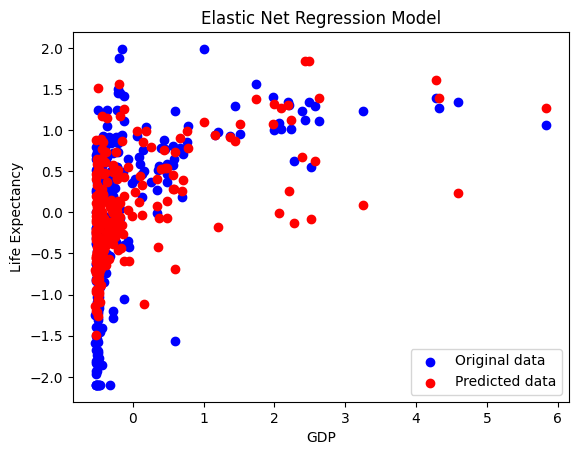

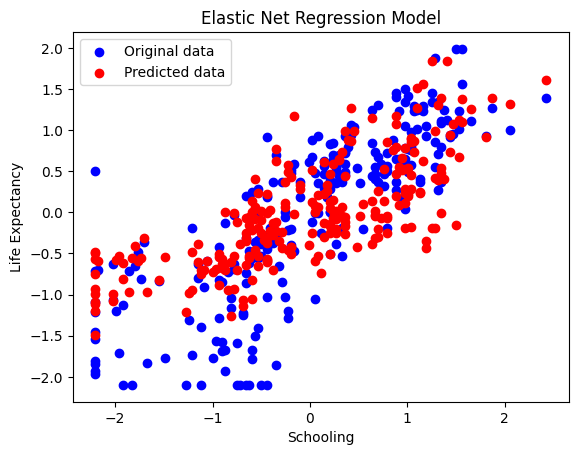

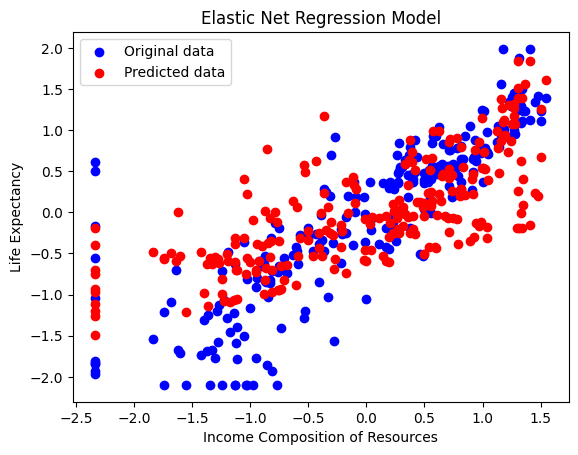

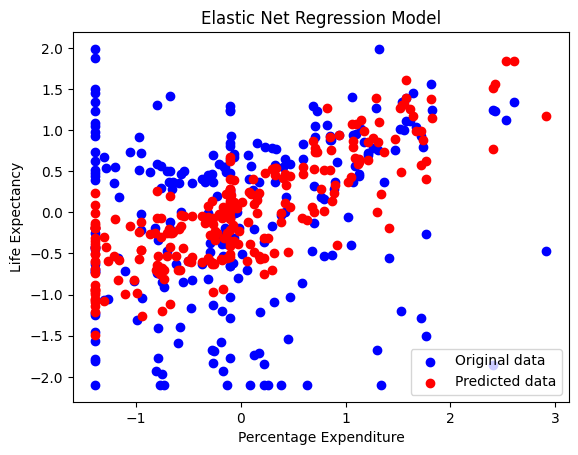

In [151]:
#displaying elastic net regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(Schooling_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(Schooling_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()


In [152]:
#making predictions with elastic net regression model

new_GDP = 100000
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_Schooling, new_IncomeCompositionOfResources, new_PercentageExpenditure]])
# Fit the elastic net regression model before making predictions
elastic_net_model.fit(X_train, LifeExpectancy_train)
predicted_life_expectancy_elastic_net = elastic_net_model.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_elastic_net)


Predicted Life Expectancy: [7958.35718382]


### Does your social group affect your life expectancy: Random Forest Regression

In [153]:
# Does social group affect life expectancy: Random Forest

# reshape data
from sklearn.ensemble import RandomForestRegressor
import numpy as np
GDP_train= GDP_train.to_numpy().reshape(-1, 1)
Schooling_train = Schooling_train.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_train = IncomeCompositionOfResources_train.to_numpy().reshape(-1, 1)
PercentageExpenditure_train = PercentageExpenditure_train.to_numpy().reshape(-1, 1)

GDP_test = GDP_test.to_numpy().reshape(-1, 1)
Schooling_test = Schooling_test.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_test = IncomeCompositionOfResources_test.to_numpy().reshape(-1, 1)
PercentageExpenditure_test = PercentageExpenditure_test.to_numpy().reshape(-1, 1)

GDP_val = GDP_val.to_numpy().reshape(-1, 1)
Schooling_val = Schooling_val.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_val = IncomeCompositionOfResources_val.to_numpy().reshape(-1, 1)
PercentageExpenditure_val = PercentageExpenditure_val.to_numpy().reshape(-1, 1)



In [154]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# train model

#establish training features
X_train = np.concatenate((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train), axis = 1)
m = len(X_train)
X_train_with_bias = np.concatenate((np.ones((m,1)), X_train), axis=1)
y_train = LifeExpectancy_train

# fit model
regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)
regressor.fit(X_train_with_bias, y_train)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=42)

In [155]:
# cross validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cv_scores_2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

NameError: name 'cross_val_score' is not defined

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n '.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/_{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
#establish validation features
X_val = np.concatenate((GDP_val, Schooling_val, IncomeCompositionOfResources_val, PercentageExpenditure_val), axis = 1)
m = len(X_val)
X_val_with_bias = np.concatenate((np.ones((m,1)), X_val), axis=1)
y_val = LifeExpectancy_val

In [ ]:
# optimise with validation data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50],
    'max_features': ['auto'],
    'max_depth': [8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=777),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)


grid_search.fit(X_val_with_bias, y_val)
print_results(grid_search)

# Get the best parameters
best_params = grid_search.best_params_

# Instantiate a RandomForestRegressor with the best parameters
model_grid = RandomForestRegressor(**best_params, random_state=42)

# Train the model with the best parameters on the validation data
model_grid.fit(X_val_with_bias, y_val)



In [ ]:
# cross validation
cv_scores = cross_val_score(model_grid, X_train, y_train, cv=6, scoring='r2')
cv_scores_2 = cross_val_score(model_grid, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

In [ ]:
# test model
from sklearn.metrics import mean_squared_error, r2_score

X_test = np.concatenate((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test), axis = 1)
m = len(X_test)
X_test_with_bias = np.concatenate((np.ones((m,1)), X_test), axis=1)
y_test = LifeExpectancy_test

# Make predictions on the test data
y_prediction = model_grid.predict(X_test_with_bias)


In [ ]:
# Displaying
# GDP
plt.scatter(GDP_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(GDP_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("GDP")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and GDP")
plt.legend()
plt.show()

plt.scatter(Schooling_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(Schooling_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Average number of years spent in education")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Schooling")
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(IncomeCompositionOfResources_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Income composition of resources index score")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Income Composition of Resources")
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(PercentageExpenditure_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Percentage expenditure (%)")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Percentage of Government Expenditure on Healthcare")
plt.legend()
plt.show()

## Sub Question Models

### Do Educated people earn more money: Lasso Regression

In [162]:
# Tiernan Do educated people earn more money?

# train lasso regression model
from sklearn.linear_model import Lasso
import numpy as np

lasso_model = Lasso(alpha=0.1)  # Using Lasso with alpha=0.1
X_train = np.column_stack((GDP_train, IncomeCompositionOfResources_train))
lasso_model.fit(X_train, Schooling_train)

print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)


Coefficients: [0.         0.75129098]
Intercept: [0.00572024]


In [163]:
# test lasso regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, IncomeCompositionOfResources_test))
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(Schooling_test, y_pred_lasso)
print("Mean squared error:", mse_lasso)

Mean squared error: 0.22691989821962258


In [164]:
# test using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(Schooling_test, y_pred_lasso)
print("R2 Score:", r2)

R2 Score: 0.779225124879237


In [166]:
# optimising lasso model
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()

# create dictionary of hyperparameters to search
hyperparameters = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# create grid search object
grid_search = GridSearchCV(lasso_model, hyperparameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, IncomeCompositionOfResources_train))
grid_search.fit(X, Schooling_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001}
Best score: -0.26712447337969003


In [167]:
# retrain lasso model with best hyperparameters
lasso_model = Lasso(alpha=0.001)
X = np.column_stack((GDP_train, IncomeCompositionOfResources_train))
lasso_model.fit(X, Schooling_train)

Lasso(alpha=0.001)

In [168]:
# testing lasso model with best hyperparameters
X_test = np.column_stack((GDP_test, IncomeCompositionOfResources_test))
y_pred_lasso = grid_search.predict(X_test)
mse_lasso = mean_squared_error(Schooling_test, y_pred_lasso)
print("Mean squared error:", mse_lasso)

# testing lasso regression model using r2 score and best hyperparameters
r2 = r2_score(Schooling_test, y_pred_lasso)
print("R2 Score:", r2)

Mean squared error: 0.20230766521777863
R2 Score: 0.8031708551129347


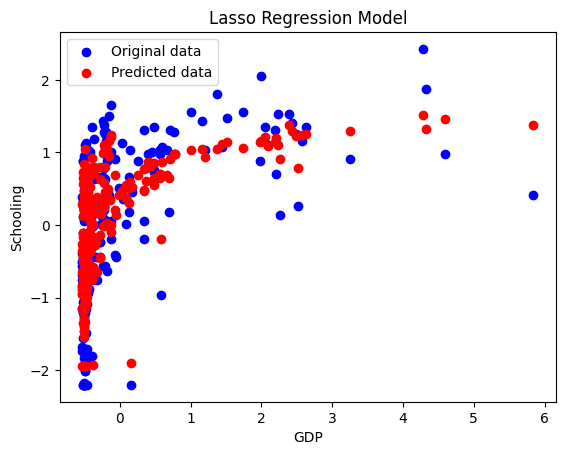

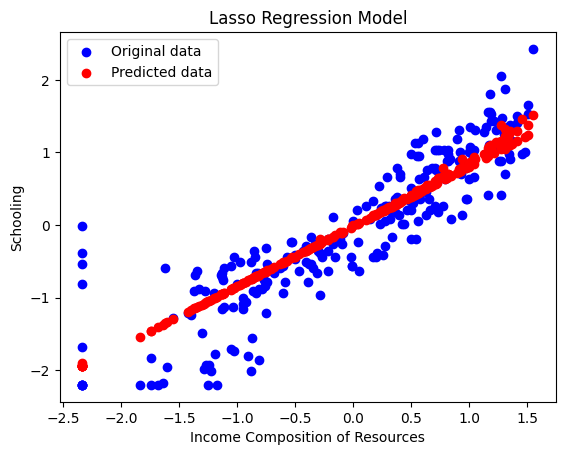

In [169]:
# displaying lasso regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, Schooling_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Schooling')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, Schooling_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Schooling')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

In [170]:
# making predictions with lasso regression model
new_GDP = 100000
new_IncomeCompositionOfResources = 0.5
X_new = np.array([[new_GDP, new_IncomeCompositionOfResources]])
predicted_schooling_lasso = grid_search.predict(X_new)
print("Predicted Schooling:", predicted_schooling_lasso)

Predicted Schooling: [5626.35102005]


### Do vaccines affect life expectancy: Linear and Polynomial Regression


Linear Regression with PCA

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Polio_test, LifeExpectancy_test, label='Polio', color='red')
plt.scatter(Diphtheria_test, LifeExpectancy_test, label='Diphtheria', color='green')
plt.scatter(HepatitisB_test, LifeExpectancy_test, label='Hepatitis B', color='blue')
plt.xlabel('Vaccinations')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Vaccinations vs. Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

data = {
    'Polio': Polio_test,
    'Diphtheria': Diphtheria_test,
    'Hepatitis B': HepatitisB_test,
    'Life Expectancy': LifeExpectancy_test
}
df = pd.DataFrame(data)
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


In [ ]:
#Training vaccines model
import numpy as np
from sklearn.linear_model import LinearRegression

X = Vaccinations_train.reshape(-1, 1)
model = LinearRegression(fit_intercept = True)
model.fit(X, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
#testing vaccines model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test = Vaccinations_test.reshape(-1, 1)
y_pred = model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


In [ ]:
predictions = model.predict(Vaccinations_test)
unstandardized_predictions = (predictions * std_life_expectancy) + mean_life_expectancy
unstandardized_predictions

In [ ]:
# Plot original vs predicted data
import matplotlib.pyplot as plt


plt.scatter(LifeExpectancy_test, y_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Linear Regression with PCA)')
plt.legend()
plt.show()


Linear Regression without PCA

In [ ]:
#training vaccines model without dimensionality reduction (PCA)
from sklearn.linear_model import LinearRegression
import numpy as np


X_train = np.column_stack((HepatitisB_train, Polio_train, Diphtheria_train))
model = LinearRegression(fit_intercept = True)
model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
#testing vaccines model without dimensionality reduction (PCA)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
y_pred= model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean squared error:", mse)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)

In [ ]:
import numpy as np
X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
predictions = model.predict(X_test)
unstandardized_predictions = (predictions * std_life_expectancy) + mean_life_expectancy
unstandardized_predictions

In [ ]:
import matplotlib.pyplot as plt

X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
plt.scatter(LifeExpectancy_test, model.predict(X_test), color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Linear Regression without PCA)')
plt.legend()
plt.show()



Polynomial Regression without PCA

In [ ]:
#optimization
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_val = np.column_stack((HepatitisB_val, Polio_val, Diphtheria_val))
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, LifeExpectancy_val)
print("Best negative mean squared error:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


In [ ]:
#Polynomial Regression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = np.column_stack((HepatitisB_train, Polio_train, Diphtheria_train))
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression(fit_intercept = True)
model.fit(X_poly, LifeExpectancy_train)



In [ ]:
#Testing polynomial regression model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
X_poly_test = poly.transform(X_test)
y_test_pred = model.predict(X_poly_test)
test_error = mean_squared_error(LifeExpectancy_test, y_test_pred)
print("Mean Squared Error:", test_error)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


In [ ]:
X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
X_poly_test = poly.transform(X_test)
y_test_pred = model.predict(X_poly_test)
y_test_pred = (y_test_pred * std_life_expectancy) + mean_life_expectancy
y_test_pred

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_test_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Polynomial Regression))')
plt.legend()
plt.show()


Polynomial Regression with PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Vaccinations_val, LifeExpectancy_val)
best_model = grid_search.best_estimator_
print("Best degree of polynomial features:", best_model.named_steps['poly'].degree)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(Vaccinations_train)
model = LinearRegression(fit_intercept = True)
model.fit(X_poly_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = best_model.predict(Vaccinations_test)
mse = mean_squared_error(LifeExpectancy_test, predictions)
print("Mean Squared Error ", mse)
r2 = r2_score(LifeExpectancy_test, predictions)
print("R-squared", r2)


In [ ]:
X_poly_test = poly.transform(Vaccinations_test)
y_test_pred = model.predict(X_poly_test)
y_test_pred = (y_test_pred * std_life_expectancy) + mean_life_expectancy
y_test_pred

### Does Money make people live longer: Elastic Net Regression

In [ ]:
#Does money make people live longer
from sklearn.linear_model import ElasticNet
import numpy as np

# train elastic net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using Elastic Net with alpha=0.1 and l1_ratio=0.5
X_train = np.column_stack((GDP_train, PercentageExpenditure_train))
elastic_net_model.fit(X_train, LifeExpectancy_train)


In [159]:
print("Coefficients:", elastic_net_model.coef_)
print("Intercept:", elastic_net_model.intercept_)

Coefficients: [0.0795456  0.3373184  0.4564837  0.01231063]
Intercept: -0.0022753425064059116


In [160]:
# testing elastic net regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)


ValueError: X has 2 features, but ElasticNet is expecting 4 features as input.

In [ ]:
# testing elastic net regression model using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

In [161]:
#optimising elastic net model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

# create Elastic Net model
elastic_net_model = ElasticNet()

# create a dictionary of hyperparameters to search
search_parameters = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

# create grid search object
grid_search = GridSearchCV(elastic_net_model, search_parameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.01}
Best score: -0.7735888382910727


In [ ]:
# retrain elastic net model with best hyperparameters
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.01)
X = np.column_stack((GDP_train, PercentageExpenditure_train))
elastic_net_model.fit(X, LifeExpectancy_train)


In [ ]:
#testing elastic net model with best hyperparameters
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = grid_search.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

# testing elastic net regression model using r2 score and best hyperparameters
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

In [ ]:
#displaying elastic net regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

In [ ]:
#making predictions with elastic net regression model
new_GDP = 100000
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_PercentageExpenditure]])
predicted_life_expectancy_elastic_net = grid_search.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_elastic_net)

### Does your region affect your life expectancy: Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
X_train = np.concatenate((Continents_train, Development_status_train), axis=1)
y_train = LifeExpectancy_train
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(X_train, y_train)

In [ ]:
# cross validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cv_scores_2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

In [ ]:
# optimise
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X_val = np.concatenate((Continents_val, Development_status_val), axis = 1)
y_val = LifeExpectancy_val

param_grid = {
    'n_estimators': [4, 6],
    'max_features': [4, 9],
    'max_depth': [8],
    'min_samples_split': [2, 7],
    'min_samples_leaf': [4, 8]
}
# Instantiate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),  # RandomForestRegressor instance
    param_grid=param_grid,  # Hyperparameter grid
    cv=5,  # 5-fold cross-validation
    scoring='r2'  # Scoring metric
)
grid_search.fit(X_val, y_val)

# Print results
print_results(grid_search)

best_params = grid_search.best_params_

model_grid = RandomForestRegressor(**best_params, random_state=23)
model_grid.fit(X_train, y_train)

In [ ]:
# cross validation
cv_scores = cross_val_score(model_grid, X_train, y_train, cv=4, scoring='r2')
cv_scores_2 = cross_val_score(model_grid, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test =np.concatenate((Continents_test, Development_status_test), axis=1)
y_test = LifeExpectancy_test
y_prediction = model_grid.predict(X_test)

In [ ]:
lifeexpec_test_graphable = pd.DataFrame(y_test)
lifeexpec_pred_graphable= pd.DataFrame(y_prediction)
lifeexpec_pred_graphable.rename(columns = {0:'Lifeexpectancy'}, inplace = True)

Continents_test_graphable =  pd.DataFrame(Continents_test)
test_graph = pd.concat([Continents_test_graphable, lifeexpec_test_graphable], axis = 1)
Continents_test_graphable.reset_index(drop=True, inplace=True)
predict_graph =  pd.concat([Continents_test_graphable, lifeexpec_pred_graphable], axis = 1)

dev_test_graphable = pd.DataFrame(Development_status_test)
dev_le_test_graph = pd.concat([dev_test_graphable, lifeexpec_test_graphable], axis = 1)
Continents_test_graphable.reset_index(drop=True, inplace=True)
dev_le_pred_graph = pd.concat([dev_test_graphable, lifeexpec_pred_graphable], axis = 1)


In [ ]:
continent_means_test = {}
continent_means_pred = {}

for continent in ['Europe', 'Asia', 'North America', 'Oceania', 'South America', 'Africa']:

    continent_df_test = test_graph[test_graph[continent] == 1]
    continent_df_pred = predict_graph[predict_graph[continent] == 1]

    mean_life_expectancy_test = continent_df_test['Lifeexpectancy'].mean()
    mean_life_expectancy_pred = continent_df_pred['Lifeexpectancy'].mean()

    continent_means_test[continent] =(mean_life_expectancy_test * std_life_expectancy) + mean_life_expectancy
    continent_means_pred[continent] = (mean_life_expectancy_pred * std_life_expectancy) + mean_life_expectancy

continent_means_series_test = pd.Series(continent_means_test)
continent_means_series_pred = pd.Series(continent_means_pred)

bar_width = 0.35
range1 = range(len(continent_means_series_test))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range1, continent_means_series_test, color='limegreen', width=bar_width, edgecolor='grey', label='Test Data')
plt.bar(range2, continent_means_series_pred, color='blue', width=bar_width, edgecolor='grey', label='Prediction Data')
plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Mean Life Expectancy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(continent_means_series_test))], continent_means_series_test.index, rotation=45)
plt.title('Mean Life Expectancy by Continent', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
dev_means_test = {}
dev_means_pred = {}

for status in ['Developed', 'Developing']:

    dev_df_test = dev_le_test_graph[dev_le_test_graph[status] == 1]
    dev_df_pred = dev_le_pred_graph[dev_le_pred_graph[status] == 1]

    mean_life_expectancy_test = dev_df_test['Lifeexpectancy'].mean()
    mean_life_expectancy_pred = dev_df_pred['Lifeexpectancy'].mean()

    dev_means_test[status] = (mean_life_expectancy_test * std_life_expectancy) + mean_life_expectancy
    dev_means_pred[status] = (mean_life_expectancy_pred * std_life_expectancy) + mean_life_expectancy

print(dev_means_test)
dev_means_test_series = pd.Series(dev_means_test)
dev_means_pred_series = pd.Series(dev_means_pred)

bar_width = 0.35
range1 = range(len(dev_means_test_series))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))

plt.bar(range1, dev_means_test_series, color='limegreen', width=bar_width, edgecolor='grey', label='Test Data')
plt.bar(range2, dev_means_pred_series, color='blue', width=bar_width, edgecolor='grey', label='Prediction Data')
plt.xlabel('Development status', fontweight='bold')
plt.ylabel('Mean Life Expectancy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(dev_means_test_series))], dev_means_test_series.index, rotation=45)
plt.title('Mean Life Expectancy by Development Status', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()